# Importação das bibliotecas

In [1]:
""" Importing necessary libraries for SVD microarray analysis """

# %pip install numpy==2.3.0 pandas==2.3.0 matplotlib==3.10.3 scipy==1.15.3 ncbi-datasets-pylib==16.6.1 GEOparse==2.0.4

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.linalg import svd
from scipy.sparse import eye as sparse_eye
from scipy.linalg import solve

from ncbi.datasets import GeneApi # Not used
import GEOparse as gp # Not used but could be useful for full streamlining the process

In [14]:
""" Loading the microarray data """

def load_from_geneapi():
    """ Function to load data from NCBI Gene API """

    gene_api = GeneApi()
    print(type(gene_api))

def load_from_geoparse():
    """ Function to load data from GEOparse """

    # Example of loading a GEO dataset
    gse = gp.get_GEO("GSE27011")  # Replace with actual GEO accession number
    print(type(gse))

def load_from_manual_selected_series() -> pd.DataFrame:
    """ Function to load manually selected series data """
    # Read data from a CSV file
    path = "../Data/manual_series_splitting.csv"
    df = pd.read_csv(path, delimiter=',', header=0)  # Replace with actual file path
    # print(df.head())
    return df


MatrizNCBI = load_from_manual_selected_series()

# Visualizações

In [15]:
""" Size """

MatrizNCBI.shape  # Returns the shape of the matrix (genes x samples)

(28231, 55)

array([[<Axes: title={'center': 'ID_REF'}>,
        <Axes: title={'center': 'GSM665386'}>,
        <Axes: title={'center': 'GSM665387'}>,
        <Axes: title={'center': 'GSM665388'}>,
        <Axes: title={'center': 'GSM665389'}>,
        <Axes: title={'center': 'GSM665390'}>,
        <Axes: title={'center': 'GSM665391'}>],
       [<Axes: title={'center': 'GSM665392'}>,
        <Axes: title={'center': 'GSM665393'}>,
        <Axes: title={'center': 'GSM665394'}>,
        <Axes: title={'center': 'GSM665395'}>,
        <Axes: title={'center': 'GSM665396'}>,
        <Axes: title={'center': 'GSM665397'}>,
        <Axes: title={'center': 'GSM665398'}>],
       [<Axes: title={'center': 'GSM665399'}>,
        <Axes: title={'center': 'GSM665400'}>,
        <Axes: title={'center': 'GSM665401'}>,
        <Axes: title={'center': 'GSM665402'}>,
        <Axes: title={'center': 'GSM665403'}>,
        <Axes: title={'center': 'GSM665404'}>,
        <Axes: title={'center': 'GSM665405'}>],
       [<Axes

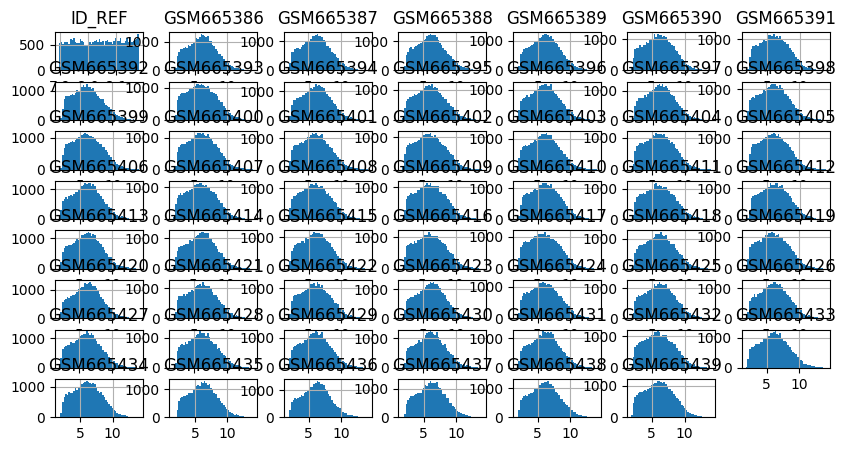

In [16]:
""" Showing some of the loaded data """

MatrizNCBI.hist(figsize=(10, 5), bins=50)

In [17]:
""" Head """

# Display head but without line break
print(MatrizNCBI.head().to_string(index=False))


 ID_REF  GSM665386  GSM665387  GSM665388  GSM665389  GSM665390  GSM665391  GSM665392  GSM665393  GSM665394  GSM665395  GSM665396  GSM665397  GSM665398  GSM665399  GSM665400  GSM665401  GSM665402  GSM665403  GSM665404  GSM665405  GSM665406  GSM665407  GSM665408  GSM665409  GSM665410  GSM665411  GSM665412  GSM665413  GSM665414  GSM665415  GSM665416  GSM665417  GSM665418  GSM665419  GSM665420  GSM665421  GSM665422  GSM665423  GSM665424  GSM665425  GSM665426  GSM665427  GSM665428  GSM665429  GSM665430  GSM665431  GSM665432  GSM665433  GSM665434  GSM665435  GSM665436  GSM665437  GSM665438  GSM665439
7896746   8.902999   8.629999   8.551550   9.108754   9.086700   8.240919   9.667110   8.803984   8.879289   9.007490   8.808076   6.290633   9.062294   8.775839   8.891723   9.938606   8.343855   8.539127   9.264410   8.597800   8.484692   8.983711   9.216719   9.126251   9.199785   8.512895   8.004516   8.652700   8.680143   8.386503   8.827399   8.622229   9.469406   8.610807   8.530388   8.1

In [18]:
""" Description of the data """

MatrizNCBI.describe()

,ID_REF,GSM665386,GSM665387,GSM665388,GSM665389,GSM665390,GSM665391,GSM665392,GSM665393,GSM665394,...,GSM665430,GSM665431,GSM665432,GSM665433,GSM665434,GSM665435,GSM665436,GSM665437,GSM665438,GSM665439
count,2.823100e+04,28231.000000,28231.000000,28231.000000,28231.000000,28231.000000,28231.000000,28231.000000,28231.000000,28231.000000,...,28231.000000,28231.000000,28231.000000,28231.000000,28231.000000,28231.000000,28231.000000,28231.000000,28231.000000,28231.000000
mean,8.040833e+06,6.158185,6.188332,6.161321,6.172703,6.151281,6.154768,6.160608,6.152590,6.167954,...,6.183345,6.161376,6.162317,6.174017,6.163378,6.232251,6.183654,6.176419,6.189327,6.153077
std,8.258678e+04,2.176387,2.167186,2.178480,2.168267,2.191705,2.205494,2.213747,2.231659,2.178420,...,2.163727,2.176376,2.216043,2.187861,2.194974,2.146146,2.117478,2.145702,2.172683,2.204084
min,7.896746e+06,1.704688,1.862209,1.774430,1.777251,1.927497,1.716382,1.764922,1.809238,1.760860,...,1.824865,1.787920,1.937577,1.848497,1.733826,1.644248,1.815828,1.727709,1.837888,1.921506
25%,7.969010e+06,4.496006,4.533827,4.500546,4.519725,4.449709,4.426276,4.443765,4.394314,4.499106,...,4.521766,4.514387,4.415427,4.498339,4.456363,4.605317,4.605632,4.550114,4.546133,4.443307
50%,8.041553e+06,6.115733,6.137434,6.094641,6.122876,6.083673,6.060774,6.035759,6.041053,6.123442,...,6.121924,6.120606,6.037223,6.115238,6.091631,6.196456,6.191195,6.135060,6.137455,6.088761
75%,8.112805e+06,7.637633,7.657370,7.602382,7.654126,7.684373,7.720757,7.665007,7.738675,7.653828,...,7.643887,7.619341,7.740622,7.690460,7.695393,7.689391,7.603157,7.635862,7.649493,7.711910
max,8.180418e+06,14.131714,14.045555,14.067743,14.038022,14.049379,14.059024,14.069864,14.108633,14.068413,...,14.060578,14.046548,14.053486,14.020564,14.054565,14.061025,14.074397,14.026586,14.063512,14.054856


# Construção de um Classificador

## Primeira Etapa: Decomposição


In [34]:
""" Primeira Etapa - Decomposição

Escolher um microarray dentre os disponíveis no NCBI. Fazer o download da matriz, caracterizando o problema subjacente ao microarray como um vector space model, onde se deseja resolver problemas de classificação. Descrever as entidades e o tipo de atributos utilizados. Resolver eventuais omissões como os atributos cujos valores não foram informados.

MatrizNCBI deve estar carregada como um np.ndarray (genes x amostras)

Seleção das colunas da matriz: aqui estou selecionando apenas os pacientes

controle (sem asma, do 1 ao 19) e os pacientes com asma severa (39 ao final), excluo os pacientes com asma moderada
"""

# asthma_count = {
#     'control': 19,  # Number of control samples
#     'mild': 19,  # Number of mild asthma samples (not used in this example)
#     'severe_asthma': 17,  # Number of severe asthma samples
# }

# MatrizNCBI (28231, 55): 28231 genes, 55 samples
df_no_asthma = MatrizNCBI.iloc[:, :19]  # Get only the 1 ~ 19 columns (control)
df_severe_asthma = MatrizNCBI.iloc[:, 38:]  # Get only the 38 ~ end columns (severe asthma)

# print(MatrizNCBI.shape)  # (28231, 55)
# print(df_no_asthma.shape)  # (28231, 19)
# print(df_severe_asthma.shape)  # (28231, 17)

Ans = np.concatenate((df_no_asthma, df_severe_asthma), axis=1) # Concatenate both control and severe asthma data
# Ans (28231, 36): 28231 genes, 36 samples (19 control + 17 severe asthma)

# SVD (decomposição em valores singulares) - usar os componentes para visualizar variância e calcular centróides, é uma etapa de exploração dimensional.

transp_ans = Ans.T  # Transpose the matrix to have genes as rows and samples as columns
# transp_ans(36, 28231): 36 samples, 28231 genes


transp_ans = transp_ans - np.mean(transp_ans, axis=0)  # Subtract mean of each column (sample)

T, S, V = svd(transp_ans, full_matrices=False)
# transp_ans (M, N) -> T (M, K), S (K,), V (K, N)
# where M = 36 (samples), N = 28231 (genes), K = min(M, N) = 36
# transp_ans (36, 28231) -> T (36, 36), S (36,), V (36, 28231)
# if full_matrices is False:
# - T = U (M, M|min(M, N)) = (36, 36): Unitary matrix having left singular vectors as columns
# - S = s (min(M, N),) = (36,): The singular values, sorted in non-increasing order
# - V = Vh (N|min(M, N), N) = (36, 28231): Unitary matrix having right singular vectors as rows

# print S as a table without breaks

print(S)

# S = np.diag(S_diag)

# diagonal_S = S_diag
# dist_import_relativa = diagonal_S / np.sum(diagonal_S)

# plt.figure()
# plt.grid(True)
# plt.plot(dist_import_relativa, '*')





# plt.plot(dist_import_relativa)
# plt.show()

# # A matriz PC_scores representa as entidades (amostras) projetadas no novo espaço dos PCs (35x35).

# PC_scores = T @ S  # PC_scores será 35x35

# # Esses "scores" são as representações das suas 35 amostras em um novo espaço de menor dimensão, onde os dados estão reorganizados para capturar a maior variação possível nos primeiros componentes (tipo PCA).

# # Labels: 0 para controle, 1 para asma severa
# labels = np.concatenate((np.zeros(19), np.ones(17)))

# # Índices

# controle_idx = (labels == 0)
# asma_idx = (labels == 1)

# # Cálculo dos centróides nos 3 primeiros PCs

# centroide_controle = PC_scores[controle_idx, :3].mean(axis=0)
# centroide_asma = PC_scores[asma_idx, :3].mean(axis=0)

# # Distância entre centróides

# distancia_centroide = np.linalg.norm(centroide_controle - centroide_asma)
# print(f'Distância entre centróides: {distancia_centroide:.4f}')

# # ANOVA

# group = np.array(['controle'] * 19 + ['asma'] * 17)
# anova_result = stats.f_oneway(PC_scores[controle_idx, 0], PC_scores[asma_idx, 0])
# print(f'p-valor da ANOVA no PC1: {anova_result.pvalue:.4e}')

[1.33220035e+09 8.97012750e+01 7.48452490e+01 6.73903626e+01
 6.17850010e+01 5.23332020e+01 4.80214149e+01 4.78820128e+01
 4.36082855e+01 4.13458065e+01 3.85572500e+01 3.79928433e+01
 3.61439678e+01 3.56472750e+01 3.42057994e+01 3.27933869e+01
 3.16054219e+01 3.15390829e+01 3.07448207e+01 3.00406805e+01
 2.99016097e+01 2.86560559e+01 2.82772657e+01 2.77600101e+01
 2.75985859e+01 2.73670071e+01 2.71414369e+01 2.67988762e+01
 2.62716538e+01 2.59275815e+01 2.57733915e+01 2.52906333e+01
 2.50389229e+01 2.46731628e+01 2.42558671e+01 5.34384453e-07]


In [ ]:
""" Etapa 2 """
# Construção de um Classificador: usar um modelo de regressão logística modificada para proceder à classificação dos problemas associados, considerando a matriz de entidades completa.

Aux = S @ Vt
x = Aux[0, :]
y = Aux[1, :]
z = Aux[2, :]

matriz_3x36 = np.array([x, y, z])

# Criação do gráfico
plt.figure()
plt.title('Projeção das Amostras no Espaço PC1 x PC2')
plt.xlabel('Primeiro Componente Principal (PC1)')
plt.ylabel('Segundo Componente Principal (PC2)')
plt.grid(True)

plt.scatter(x[labels == 0], y[labels == 0], c='r', label='Controle')
plt.scatter(x[labels == 1], y[labels == 1], facecolors='none',
            edgecolors='r', label='Asma severa')
plt.legend()
plt.show()

# Visualização antes da regressão logística modificada

Ans_Teste = np.concatenate((MatrizNCBI[:, :19], MatrizNCBI[:, 38:]), axis=1).T
# Centraliza com média do Ans original
Ans_Teste = Ans_Teste - np.mean(Ans, axis=0)

U, S2_diag, Vt = svd(Ans_Teste, full_matrices=False)
S2 = np.diag(S2_diag)
PC_scores_Teste = U @ S2  # Projeção

xt = PC_scores_Teste[:, 0]
yt = PC_scores_Teste[:, 1]

plt.figure()
plt.title('Projeção das Amostras no Espaço PC1 x PC2 (via SVD)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.scatter(xt[labels == 0], yt[labels == 0], c='r', label='Controle')
plt.scatter(xt[labels == 1], yt[labels == 1], facecolors='none',
            edgecolors='k', linewidths=1.2, label='Asma severa')
plt.legend()
plt.show()

# ======
# Selection of the 10 most important markers


def solve_system(A, b):
    m, n = A.shape
    Im = sparse_eye(m).toarray()
    In = sparse_eye(n).toarray()
    M = np.block([[Im, -A], [-A.T, In]])
    nb = np.zeros(m + n)
    nb[:m] = -b
    x = np.linalg.solve(M, nb)
    alpha = x[m:]
    return alpha, x


# Modified logistic regression thresholds
logit_ch1 = 12
logit_ch0 = -12

DataMatrix = Ans.T  # genes x amostras (35 amostras)

m, n = DataMatrix.shape
b = np.zeros(n)
b[:19] = logit_ch1
b[19:] = logit_ch0

alpha, _ = solve_system(DataMatrix.T, b)

plt.figure()
plt.title('Weights Associated with Attributes')
plt.plot(alpha, '*')
plt.show()

aux = DataMatrix.T @ alpha
num = np.exp(aux)
p = num / (1 + num)

plt.figure()
plt.title('Logistic Regression Classification - All Attributes')
plt.plot(p, '*')
plt.show()

# Validate the markers
positions = np.argsort(alpha)
selected = np.concatenate((positions[:7], positions[-7:]))

ReducedMatrix = DataMatrix[selected, :]

T, S_diag, Vt = svd(ReducedMatrix, full_matrices=False)
singular_values = S_diag
relative_importance = singular_values / np.sum(singular_values)

plt.figure()
plt.title('Relative Singular Values of the Reduced Matrix')
plt.grid(True)
plt.plot(relative_importance, '*')
plt.plot(relative_importance)
plt.show()

AuxiliaryMatrix = np.diag(singular_values) @ Vt
x = AuxiliaryMatrix[0, :]
y = AuxiliaryMatrix[1, :]
z = AuxiliaryMatrix[2, :]

plt.figure()
plt.title('Entity Domain Visualization')
plt.grid(True)
plt.plot(x, y, 'or')
plt.plot(x[:20], y[:20], '*r')
plt.show()

# P(x) for the reduced matrix

new_alpha = np.linalg.lstsq(ReducedMatrix.T, b, rcond=None)[0]

plt.figure()
plt.title('Weights Associated with Selected Attributes')
plt.plot(new_alpha, '*')
plt.show()

aux = ReducedMatrix.T @ new_alpha
num = np.exp(aux)
p = num / (1 + num)

plt.figure()
plt.title('Logistic Regression Classification - Selected Attributes')
plt.plot(p, '*')
plt.show()